<a href="https://colab.research.google.com/github/nastyha002/nastyha002/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='windows-1252')
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [ ]:
import pandas as pd
import numpy as np
def create_holes(dataframe, column_name, hole_percentage = 10):

    if hole_percentage < 0 or hole_percentage > 100:
        raise ValueError("Процент дырявости должен быть в диапазоне от 0 до 100.")

    dataframe_with_holes = dataframe.copy()
    num_holes = int(len(dataframe) * (hole_percentage / 100))
    hole_indices = np.random.choice(len(dataframe), num_holes, replace=False)
    dataframe_with_holes.loc[hole_indices, column_name] = np.nan

    return dataframe_with_holes


df = create_holes(df, 'uploads')
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082.0,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1.0,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741.0,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,NaN,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536.0,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200.0,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500.0,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452.0,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39.0,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [ ]:
df_cleaned = df.dropna()
df_cleaned

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082.0,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741.0,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536.0,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493.0,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574.0,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,Migos ATL,12400000,6.993406e+09,Music,Migos ATL,99.0,United States,US,Entertainment,...,100000.0,2012.0,Jan,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200.0,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500.0,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39.0,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [ ]:
df_filled_median = df.fillna(df.median())

df_filled_median

<ipython-input-5-d58a90771547>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_median = df.fillna(df.median())


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082.0,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1.0,United States,US,Games,...,200000.0,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741.0,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,717.5,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536.0,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200.0,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500.0,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452.0,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39.0,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [ ]:
df_filled_mean = df.copy()
df_filled_mean["uploads"] = df["uploads"].fillna(df.uploads.mean())
df_filled_mean

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082.000000,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1.000000,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741.000000,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,9215.991071,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536.000000,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200.000000,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500.000000,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452.000000,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39.000000,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [ ]:
df_filled_mode = df.fillna(df["uploads"].mode()[0])

df_filled_mode

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082.0,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1.0,United States,US,Games,...,0.0,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741.0,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,0.0,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536.0,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200.0,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500.0,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,0.0,HybridPanda,2452.0,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39.0,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [ ]:
df_interpolated = df.copy()
df_interpolated["uploads"] = df["uploads"].fillna(df.interpolate().uploads)
df_interpolated

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082.0,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1.0,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741.0,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,58638.5,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536.0,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200.0,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500.0,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452.0,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39.0,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [ ]:
df_cleaned.uploads.describe()

count       503.000000
mean      14640.159046
std       43459.506009
min           1.000000
25%         435.500000
50%        1259.000000
75%        4027.000000
max      301308.000000
Name: uploads, dtype: float64

In [ ]:
df_filled_mean.uploads.describe()

count       995.000000
mean       9215.991071
std       32023.242993
min           0.000000
25%         224.500000
50%         921.000000
75%        4722.000000
max      301308.000000
Name: uploads, dtype: float64

In [ ]:
df_interpolated.uploads.describe()

count       995.000000
mean       9324.014573
std       32921.041492
min           0.000000
25%         211.250000
50%         753.000000
75%        2866.750000
max      301308.000000
Name: uploads, dtype: float64

In [ ]:
df.uploads.describe()

count       896.000000
mean       9215.991071
std       33747.918012
min           0.000000
25%         191.500000
50%         717.500000
75%        2719.000000
max      301308.000000
Name: uploads, dtype: float64

In [ ]:
df_filled_median.uploads.describe()

count       995.000000
mean       8370.412563
std       32124.223576
min           0.000000
25%         224.500000
50%         717.500000
75%        2186.000000
max      301308.000000
Name: uploads, dtype: float64

In [ ]:
df_filled_mode.uploads.describe()

count       995.000000
mean       8299.023116
std       32141.961451
min           0.000000
25%          75.500000
50%         578.000000
75%        2186.000000
max      301308.000000
Name: uploads, dtype: float64

In [ ]:
df_cleaned.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,503.000000,5.030000e+02,5.030000e+02,503.000000,5.030000e+02,503.000000,503.000000,5.030000e+02,503.000000,5.030000e+02,...,5.030000e+02,5.030000e+02,503.000000,503.000000,503.000000,5.030000e+02,503.000000,5.030000e+02,503.000000,503.000000
mean,459.286282,2.469642e+07,1.297387e+10,14640.159046,1.427763e+05,193.807157,255.592445,2.389396e+08,51978.788509,8.310091e+05,...,9.979515e+06,3.453112e+05,2012.524851,15.272366,60.810934,5.007476e+08,8.944076,2.424355e+08,25.924158,-5.825403
std,289.347758,1.923183e+07,1.660169e+10,43459.506009,7.140813e+05,767.005197,981.693856,5.000049e+08,75628.895997,1.208724e+06,...,1.452086e+07,6.096452e+05,4.111843,8.710676,26.529838,5.177632e+08,4.810220,1.636107e+08,20.251908,85.060281
min,1.000000,1.230000e+07,2.634000e+03,1.000000,1.000000e+00,1.000000,1.000000,3.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,2005.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,203.000000,1.490000e+07,4.998211e+09,435.500000,2.115000e+02,10.500000,19.000000,4.813650e+07,11450.000000,1.830000e+05,...,2.200000e+06,1.000000e+05,2009.000000,8.000000,28.100000,1.081166e+08,5.360000,6.432484e+07,20.593684,-95.712891
50%,444.000000,1.880000e+07,8.932038e+09,1259.000000,5.880000e+02,41.000000,49.000000,1.134200e+08,28000.000000,4.484000e+05,...,5.400000e+06,2.000000e+05,2013.000000,15.000000,60.000000,3.282395e+08,5.560000,2.706630e+08,30.375321,-3.749220
75%,700.000000,2.705000e+07,1.570467e+10,4027.000000,1.615000e+03,106.000000,115.500000,2.358540e+08,58350.000000,9.335000e+05,...,1.120000e+07,4.000000e+05,2015.000000,22.500000,88.200000,1.366418e+09,14.700000,4.710315e+08,37.090240,78.962880
max,995.000000,2.450000e+08,2.280000e+11,301308.000000,4.054962e+06,7683.000000,7670.000000,6.589000e+09,576000.000000,9.200000e+06,...,1.106000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.524010,138.252924


In [ ]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,896.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9215.991071,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,33747.918012,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,191.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,717.500000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2719.000000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


С помощью данной работы мы смогли ознакомиться с несколькими методами обработки пропущенных значений. Их было 5 штук, и каждый из них что-то изменял, а удаление изменяло весь датасет, не только колонку.

**Объясните**

##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


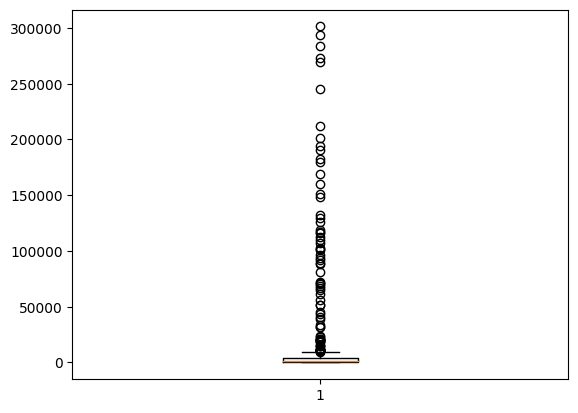

In [ ]:
df = df.dropna()
plt.boxplot(df["uploads"])
plt.show()

In [ ]:
df["uploads"].describe()

count       503.000000
mean      14640.159046
std       43459.506009
min           1.000000
25%         435.500000
50%        1259.000000
75%        4027.000000
max      301308.000000
Name: uploads, dtype: float64

In [ ]:
mean = df["uploads"].mean()
std_deviation = df["uploads"].std()
threshold = 3 * std_deviation

# Идентифицируем выбросы
outliers = [x for x in df["uploads"] if abs(x - mean) > threshold]

# Выводим результаты
print("Среднее значение данных:", mean)
print("Стандартное отклонение данных:", std_deviation)
print('Межквартальный размах:', df['uploads'].quantile(0.75)-df['uploads'].quantile(0.25))
print("Потенциальные выбросы:", outliers)

Среднее значение данных: 14640.159045725646
Стандартное отклонение данных: 43459.506009206954
Межквартальный размах: 3591.5
Потенциальные выбросы: [283775.0, 193890.0, 200933.0, 301308.0, 273255.0, 180092.0, 211620.0, 182742.0, 148225.0, 244899.0, 160405.0, 269050.0, 293516.0, 190093.0, 169304.0, 151136.0]


На графи ящик с усами мы видим большое кол-во выбросов, но если мы воспользуемся методом средних или методом межквартильного размаха, то потанцеальные выбросы значительно уменьшаться. Если смотреть по среднему значению, то оно равно 14640, стандартное отклонение равно 43459, между этими значениями большая разница, но если учитывать что это кол-во загрузок, то выбросов все равно не много.
Межквантильный размах равен 3591.
среднее больше чем межквантильный размах, это значит что оно удаляет больше значей

**Объяснения**

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [ ]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,503.000000,5.030000e+02,5.030000e+02,503.000000,5.030000e+02,503.000000,503.000000,5.030000e+02,503.000000,5.030000e+02,...,5.030000e+02,5.030000e+02,503.000000,503.000000,503.000000,5.030000e+02,503.000000,5.030000e+02,503.000000,503.000000
mean,459.286282,2.469642e+07,1.297387e+10,14640.159046,1.427763e+05,193.807157,255.592445,2.389396e+08,51978.788509,8.310091e+05,...,9.979515e+06,3.453112e+05,2012.524851,15.272366,60.810934,5.007476e+08,8.944076,2.424355e+08,25.924158,-5.825403
std,289.347758,1.923183e+07,1.660169e+10,43459.506009,7.140813e+05,767.005197,981.693856,5.000049e+08,75628.895997,1.208724e+06,...,1.452086e+07,6.096452e+05,4.111843,8.710676,26.529838,5.177632e+08,4.810220,1.636107e+08,20.251908,85.060281
min,1.000000,1.230000e+07,2.634000e+03,1.000000,1.000000e+00,1.000000,1.000000,3.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,2005.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,203.000000,1.490000e+07,4.998211e+09,435.500000,2.115000e+02,10.500000,19.000000,4.813650e+07,11450.000000,1.830000e+05,...,2.200000e+06,1.000000e+05,2009.000000,8.000000,28.100000,1.081166e+08,5.360000,6.432484e+07,20.593684,-95.712891
50%,444.000000,1.880000e+07,8.932038e+09,1259.000000,5.880000e+02,41.000000,49.000000,1.134200e+08,28000.000000,4.484000e+05,...,5.400000e+06,2.000000e+05,2013.000000,15.000000,60.000000,3.282395e+08,5.560000,2.706630e+08,30.375321,-3.749220
75%,700.000000,2.705000e+07,1.570467e+10,4027.000000,1.615000e+03,106.000000,115.500000,2.358540e+08,58350.000000,9.335000e+05,...,1.120000e+07,4.000000e+05,2015.000000,22.500000,88.200000,1.366418e+09,14.700000,4.710315e+08,37.090240,78.962880
max,995.000000,2.450000e+08,2.280000e+11,301308.000000,4.054962e+06,7683.000000,7670.000000,6.589000e+09,576000.000000,9.200000e+06,...,1.106000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.524010,138.252924


In [ ]:

df = pd.concat((df, df.iloc[0:100]))
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,603.000000,6.030000e+02,6.030000e+02,603.000000,6.030000e+02,603.000000,603.000000,6.030000e+02,603.000000,6.030000e+02,...,6.030000e+02,6.030000e+02,603.000000,603.000000,603.000000,6.030000e+02,603.000000,6.030000e+02,603.000000,603.000000
mean,395.638474,2.902471e+07,1.589497e+10,16584.344942,1.270157e+05,171.525705,232.936982,2.646782e+08,59620.115489,9.529885e+05,...,1.144701e+07,3.818137e+05,2012.280265,15.213930,60.144776,5.195268e+08,8.848806,2.473521e+08,25.913362,-4.151737
std,300.887771,2.355207e+07,2.040098e+10,47029.259161,6.737150e+05,713.061818,931.402696,4.955155e+08,84764.822653,1.354578e+06,...,1.627517e+07,6.902981e+05,4.101218,8.680314,26.756998,5.269256e+08,4.797628,1.649383e+08,19.946973,85.502525
min,1.000000,1.230000e+07,2.634000e+03,1.000000,1.000000e+00,1.000000,1.000000,3.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,2005.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,116.000000,1.525000e+07,5.603112e+09,436.000000,1.350000e+02,8.000000,15.000000,5.333300e+07,12300.000000,1.967000e+05,...,2.350000e+06,1.000000e+05,2009.000000,8.000000,28.100000,1.260140e+08,5.360000,7.992776e+07,20.593684,-95.712891
50%,345.000000,2.130000e+07,1.030352e+10,1321.000000,4.500000e+02,31.000000,39.000000,1.304610e+08,32000.000000,5.122000e+05,...,6.100000e+06,2.000000e+05,2013.000000,15.000000,60.000000,3.282395e+08,5.360000,2.706630e+08,26.820553,-3.435973
75%,651.500000,3.430000e+07,1.965064e+10,4466.000000,1.369000e+03,98.000000,102.500000,2.722550e+08,66800.000000,1.100000e+06,...,1.280000e+07,4.000000e+05,2015.000000,22.000000,88.200000,1.366418e+09,14.700000,4.710315e+08,37.090240,78.962880
max,995.000000,2.450000e+08,2.280000e+11,301308.000000,4.054962e+06,7683.000000,7670.000000,6.589000e+09,576000.000000,9.200000e+06,...,1.106000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.524010,138.252924


In [ ]:

df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082.0,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741.0,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536.0,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493.0,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574.0,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,Migos ATL,12400000,6.993406e+09,Music,Migos ATL,99.0,United States,US,Entertainment,...,100000.0,2012.0,Jan,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200.0,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500.0,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39.0,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [ ]:
df_no_duplicates.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,503.000000,5.030000e+02,5.030000e+02,503.000000,5.030000e+02,503.000000,503.000000,5.030000e+02,503.000000,5.030000e+02,...,5.030000e+02,5.030000e+02,503.000000,503.000000,503.000000,5.030000e+02,503.000000,5.030000e+02,503.000000,503.000000
mean,459.286282,2.469642e+07,1.297387e+10,14640.159046,1.427763e+05,193.807157,255.592445,2.389396e+08,51978.788509,8.310091e+05,...,9.979515e+06,3.453112e+05,2012.524851,15.272366,60.810934,5.007476e+08,8.944076,2.424355e+08,25.924158,-5.825403
std,289.347758,1.923183e+07,1.660169e+10,43459.506009,7.140813e+05,767.005197,981.693856,5.000049e+08,75628.895997,1.208724e+06,...,1.452086e+07,6.096452e+05,4.111843,8.710676,26.529838,5.177632e+08,4.810220,1.636107e+08,20.251908,85.060281
min,1.000000,1.230000e+07,2.634000e+03,1.000000,1.000000e+00,1.000000,1.000000,3.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,2005.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,203.000000,1.490000e+07,4.998211e+09,435.500000,2.115000e+02,10.500000,19.000000,4.813650e+07,11450.000000,1.830000e+05,...,2.200000e+06,1.000000e+05,2009.000000,8.000000,28.100000,1.081166e+08,5.360000,6.432484e+07,20.593684,-95.712891
50%,444.000000,1.880000e+07,8.932038e+09,1259.000000,5.880000e+02,41.000000,49.000000,1.134200e+08,28000.000000,4.484000e+05,...,5.400000e+06,2.000000e+05,2013.000000,15.000000,60.000000,3.282395e+08,5.560000,2.706630e+08,30.375321,-3.749220
75%,700.000000,2.705000e+07,1.570467e+10,4027.000000,1.615000e+03,106.000000,115.500000,2.358540e+08,58350.000000,9.335000e+05,...,1.120000e+07,4.000000e+05,2015.000000,22.500000,88.200000,1.366418e+09,14.700000,4.710315e+08,37.090240,78.962880
max,995.000000,2.450000e+08,2.280000e+11,301308.000000,4.054962e+06,7683.000000,7670.000000,6.589000e+09,576000.000000,9.200000e+06,...,1.106000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.524010,138.252924


## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [ ]:
num_features = df.select_dtypes(include=['int']).columns

num_features

Index(['rank', 'subscribers'], dtype='object')

Масштабируйте категориальные признаки через OneHotEncoder

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# MinMax масштабирование
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_features] = scaler_minmax.fit_transform(df[num_features])
df_minmax_scaled['subscribers'].unique()

array([1.00000000e+00, 6.60507091e-01, 6.30425440e-01, 4.02664375e-01,
       3.72152987e-01, 3.62698754e-01, 3.59690589e-01, 3.33046841e-01,
       3.03824667e-01, 2.72024065e-01, 2.54834551e-01, 2.53545337e-01,
       2.50107434e-01, 2.40223464e-01, 2.30339493e-01, 2.29050279e-01,
       2.24752901e-01, 2.02836270e-01, 2.01976794e-01, 1.98109153e-01,
       1.96390202e-01, 1.94671251e-01, 1.92952299e-01, 1.91663086e-01,
       1.89514396e-01, 1.81779115e-01, 1.77051998e-01, 1.76192523e-01,
       1.74473571e-01, 1.73614095e-01, 1.71465406e-01, 1.52986678e-01,
       1.51267727e-01, 1.50837989e-01, 1.47400086e-01, 1.46110872e-01,
       1.45251397e-01, 1.42672969e-01, 1.41383756e-01, 1.39235067e-01,
       1.38805329e-01, 1.37086377e-01, 1.32788999e-01, 1.29780834e-01,
       1.29351096e-01, 1.27202407e-01, 1.25053717e-01, 1.24623979e-01,
       1.22905028e-01, 1.15599484e-01, 1.15169746e-01, 1.14740009e-01,
       1.14310271e-01, 1.13021057e-01, 1.12161581e-01, 1.11731844e-01,
      

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standard масштабирование
scaler_std = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_features] = scaler_std.fit_transform(df[num_features])
df_std_scaled['subscribers'].unique()

array([ 9.17773299e+00,  5.82067809e+00,  5.52321753e+00,  3.27101614e+00,
        2.96930614e+00,  2.87581854e+00,  2.84607248e+00,  2.58260742e+00,
        2.29364573e+00,  1.97918742e+00,  1.80920996e+00,  1.79646165e+00,
        1.76246616e+00,  1.66472911e+00,  1.56699207e+00,  1.55424376e+00,
        1.51174940e+00,  1.29502813e+00,  1.28652926e+00,  1.24828433e+00,
        1.23128658e+00,  1.21428884e+00,  1.19729109e+00,  1.18454278e+00,
        1.16329560e+00,  1.08680574e+00,  1.04006194e+00,  1.03156306e+00,
        1.01456532e+00,  1.00606644e+00,  9.84819261e-01,  8.02093487e-01,
        7.85095741e-01,  7.80846305e-01,  7.46850812e-01,  7.34102502e-01,
        7.25603629e-01,  7.00107009e-01,  6.87358700e-01,  6.66111517e-01,
        6.61862080e-01,  6.44864334e-01,  6.02369968e-01,  5.72623912e-01,
        5.68374475e-01,  5.47127293e-01,  5.25880110e-01,  5.21630673e-01,
        5.04632927e-01,  4.32392505e-01,  4.28143068e-01,  4.23893632e-01,
        4.19644195e-01,  

In [ ]:
df_scaled = df.copy()
df_scaled['subscribers'] = df_std_scaled['subscribers']
df_scaled

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,9.177733,2.280000e+11,Music,T-Series,20082.0,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,5.820678,2.836884e+10,Entertainment,MrBeast,741.0,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,5.523218,1.480000e+11,Shows,SET India,116536.0,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,9,Like Nastya,3.271016,9.047906e+10,People & Blogs,Like Nastya Vlog,493.0,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,2.969306,7.718017e+10,Entertainment,Vlad and Niki,574.0,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,Worldwide Records Bhojpuri,0.113685,1.647698e+10,Music,Worldwide Records Bhojpuri,6518.0,India,IN,Music,...,200000.0,2012.0,Mar,15.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
145,146,DONA ï¿½ï¿½,0.113685,2.103175e+10,Entertainment,DONA ï¿½ï¿½,166.0,United States,US,Entertainment,...,200000.0,2018.0,Apr,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
146,147,Dream,0.113685,2.930015e+09,Gaming,Dream,116.0,United States,US,Games,...,200000.0,2014.0,Feb,8.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
147,148,Lucas and Marcus,0.109435,1.161585e+10,Entertainment,Lucas and Marcus,1321.0,United States,US,Entertainment,...,400000.0,2011.0,Jan,19.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [ ]:
df_minmax_scaled

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,0.000000,T-Series,1.000000,2.280000e+11,Music,T-Series,20082.0,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,0.002012,MrBeast,0.660507,2.836884e+10,Entertainment,MrBeast,741.0,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,0.004024,SET India,0.630425,1.480000e+11,Shows,SET India,116536.0,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,0.008048,Like Nastya,0.402664,9.047906e+10,People & Blogs,Like Nastya Vlog,493.0,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,0.009054,Vlad and Niki,0.372153,7.718017e+10,Entertainment,Vlad and Niki,574.0,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.144869,Worldwide Records Bhojpuri,0.083369,1.647698e+10,Music,Worldwide Records Bhojpuri,6518.0,India,IN,Music,...,200000.0,2012.0,Mar,15.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
145,0.145875,DONA ï¿½ï¿½,0.083369,2.103175e+10,Entertainment,DONA ï¿½ï¿½,166.0,United States,US,Entertainment,...,200000.0,2018.0,Apr,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
146,0.146881,Dream,0.083369,2.930015e+09,Gaming,Dream,116.0,United States,US,Games,...,200000.0,2014.0,Feb,8.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
147,0.147887,Lucas and Marcus,0.082939,1.161585e+10,Entertainment,Lucas and Marcus,1321.0,United States,US,Entertainment,...,400000.0,2011.0,Jan,19.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [ ]:
df["Youtuber"] = df["Youtuber"].astype("category")
df["Title"] = df["Title"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 0 to 150
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   rank                                     603 non-null    int64   
 1   Youtuber                                 603 non-null    category
 2   subscribers                              603 non-null    int64   
 3   video views                              603 non-null    float64 
 4   category                                 603 non-null    object  
 5   Title                                    603 non-null    category
 6   uploads                                  603 non-null    float64 
 7   Country                                  603 non-null    object  
 8   Abbreviation                             603 non-null    object  
 9   channel_type                             603 non-null    object  
 10  video_views_rank                      

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_features = df.select_dtypes(include=['category']).columns
df_cat_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df[cat_features])

# Получаем имена новых признаков
encoded_columns = encoder.get_feature_names_out(cat_features)
encoded_columns
# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns) # получаем датафрейм с закодированными признаками
df_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Youtuber_5-Minute Crafts PLAY,Youtuber_50 Cent,Youtuber_7clouds,Youtuber_A2 Motivation by Arvind Arora,Youtuber_A4,Youtuber_ABC News,Youtuber_ABP NEWS,Youtuber_ABS-CBN Entertainment,Youtuber_AMARINTV : ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½,Youtuber_ARY Digital HD,...,Title_ýýýýýýýýýSULGI,Title_ýýýýýýýýýý ýýýýýý,Title_ýýýýýýýýýýýý,Title_ýýýýýýýýýýýý one31,Title_ýýýýýýýýýýýýýý ýýýý,Title_ýýýýýýýýýýýýýýý Ms Yeah,Title_ýýýýýýýýýýýýýýýýýý,Title_ýýýýýýýýýýýýýýýýýýBAYASHITV,Title_ýýýýýýýýýýýýýýýýýýýýý,Title_ýýýýýýýýýýýýýýýýýýýýýý
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Добавляем новые закодированные признаки в копию датафрейма
df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns, index=df.index)

df_copy = df.copy()
df_copy = pd.concat([df_copy, df_encoded], axis=1)

# Удаление исходных категориальных признаков
df_copy = df_copy.drop(columns=cat_features)
df_copy

,rank,subscribers,video views,category,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,...,Title_ýýýýýýýýýSULGI,Title_ýýýýýýýýýý ýýýýýý,Title_ýýýýýýýýýýýý,Title_ýýýýýýýýýýýý one31,Title_ýýýýýýýýýýýýýý ýýýý,Title_ýýýýýýýýýýýýýýý Ms Yeah,Title_ýýýýýýýýýýýýýýýýýý,Title_ýýýýýýýýýýýýýýýýýýBAYASHITV,Title_ýýýýýýýýýýýýýýýýýýýýý,Title_ýýýýýýýýýýýýýýýýýýýýýý
0,1,245000000,2.280000e+11,Music,20082.0,India,IN,Music,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,166000000,2.836884e+10,Entertainment,741.0,United States,US,Entertainment,48.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,159000000,1.480000e+11,Shows,116536.0,India,IN,Entertainment,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,106000000,9.047906e+10,People & Blogs,493.0,Russia,RU,People,630.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,98900000,7.718017e+10,Entertainment,574.0,United States,US,Entertainment,8.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,31700000,1.647698e+10,Music,6518.0,India,IN,Music,177.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,146,31700000,2.103175e+10,Entertainment,166.0,United States,US,Entertainment,110.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,147,31700000,2.930015e+09,Gaming,116.0,United States,US,Games,2986.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,148,31600000,1.161585e+10,Entertainment,1321.0,United States,US,Entertainment,339.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Задание для гениев*


Реализовать расчет корреляции Спирмана

In [ ]:
#Функция по расчету тут

In [ ]:
#Пример использования тут и объяснение принципа работы

###Пример реализации

In [ ]:
import pandas as pd
import numpy as np


def corr_pearson(column_1, column_2):
  cov = np.cov(column_1, column_2)
  return cov/(column_1.std() * column_2.std())

In [ ]:
data = {
    'Рост': [170, 155, 180, 162, 175],
    'Вес': [65, 50, 75, 55, 70]
}
df = pd.DataFrame(data)
df

,Рост,Вес
0,170,65
1,155,50
2,180,75
3,162,55
4,175,70


In [ ]:
corr_pearson(df["Рост"], df["Вес"])

array([[0.96593129, 0.99674864],
       [0.99674864, 1.03527033]])